In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder

#from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv('Mall_Customers.csv')

In [13]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [14]:
df.shape[0]

200

In [15]:
df.shape[1]

5

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
df[df.duplicated()]

Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []

In [18]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [20]:
df.nunique

<bound method DataFrame.nunique of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [21]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [22]:
df.rename(columns = {"Annual Income (k$)" : "Annual_Income", "Spending Score (1-100)": "Score"}, inplace = True)

In [23]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Score'], dtype='object')

In [24]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Score'], dtype='object')

In [25]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Number of Males and Females')

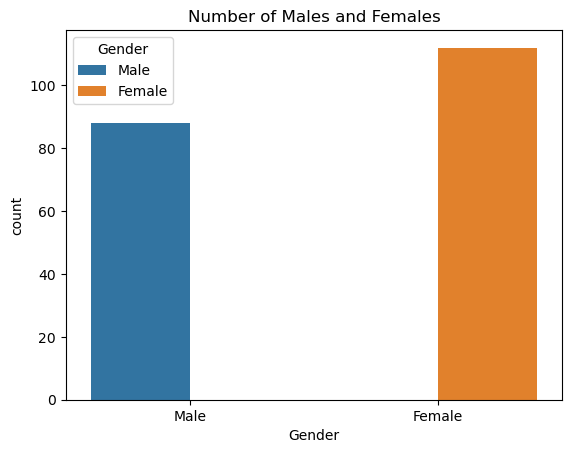

In [30]:
sns.countplot(x = 'Gender', data = df, hue = 'Gender')
plt.title("Number of Males and Females")

Text(0.5, 1.0, 'Percentages of Male and Females')

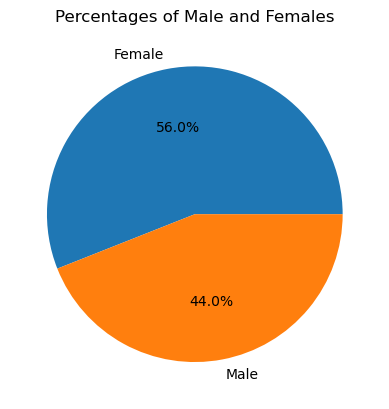

In [31]:
plt.pie(df.Gender.value_counts(), labels = ['Female', 'Male'], autopct = "%.01f%%")

plt.title('Percentages of Male and Females')

<Axes: >

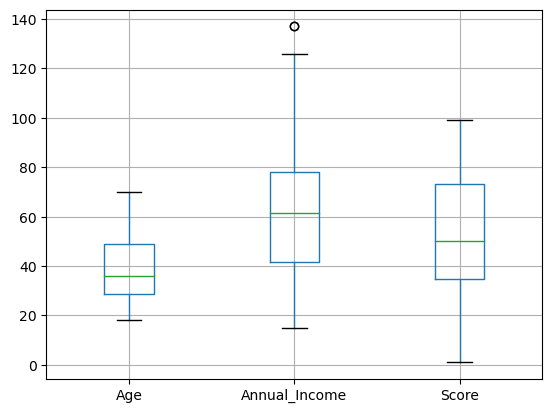

In [32]:
df.iloc[:,1:].boxplot()

Text(0.5, 0, 'Score')

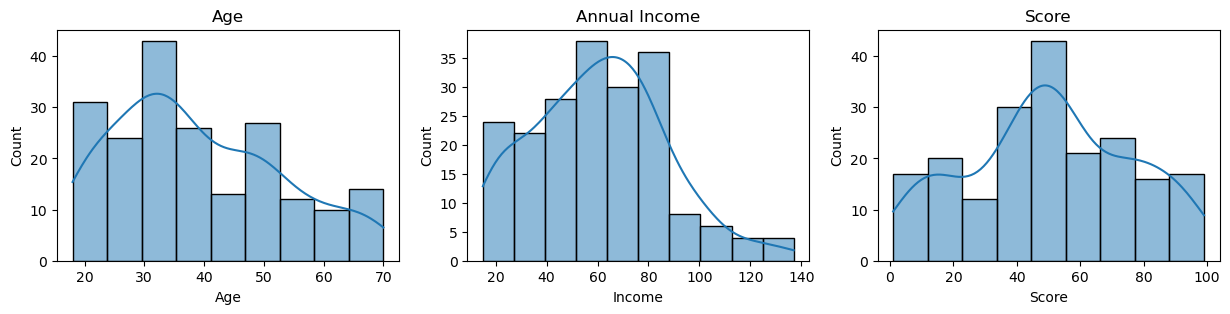

In [33]:
plt.figure(figsize = (15,3))
plt.subplot(1,3,1)

sns.histplot(df.Age, kde = True)
plt.title("Age")
plt.xlabel("Age")

plt.subplot(1,3,2)
sns.histplot(df.Annual_Income, kde = True)
plt.title("Annual Income")
plt.xlabel("Income")

plt.subplot(1,3,3)
sns.histplot(df.Score, kde = True)
plt.title("Score")
plt.xlabel("Score")

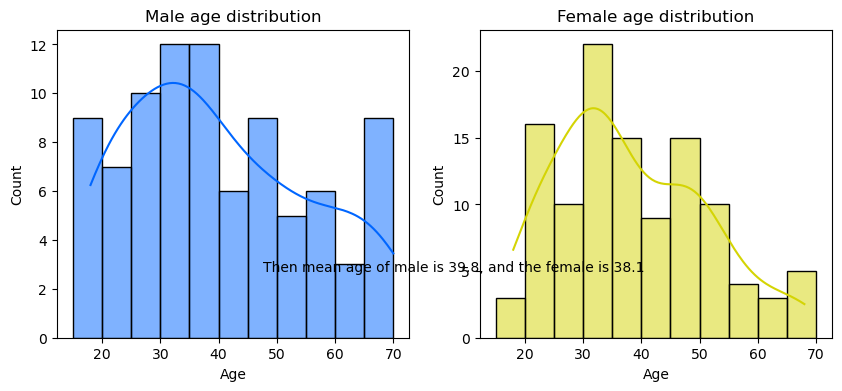

In [34]:
male = df[df.Gender == "Male"]["Age"]
female = df[df.Gender != "Male"]["Age"]

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(male, color = "#0066ff", bins = range(15,75,5), kde = True)
plt.title("Male age distribution")

plt.subplot(1,2,2)
sns.histplot(female, color = '#D4D404', bins = range(15,75,5), kde = True)
plt.title("Female age distribution")
plt.text(-25,5, f"Then mean age of male is {round(male.mean(), 1)}, and the female is {round(female.mean(), 1)}")

plt.show()

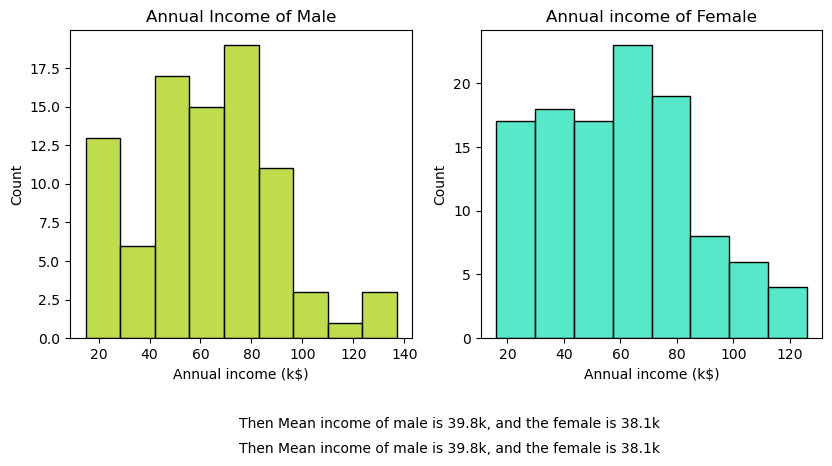

In [36]:
income_male = df[df.Gender == "Male"]["Annual_Income"]
income_female = df[df.Gender != "Male"]["Annual_Income"]

plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
sns.histplot(income_male, color='#A8D10E')
plt.title("Annual Income of Male")
plt.xlabel("Annual income (k$)")

plt.subplot(1,3,2)
sns.histplot(income_female , color = '#1DE1B8')
plt.title("Annual income of Female")
plt.xlabel("Annual income (k$)")
plt.text(-75, -7, f"Then Mean income of male is {round(male.mean(), 1)}k, and the female is {round(female.mean(), 1)}k")
plt.text(-75, -9, f"Then Mean income of male is {round(male.mean(), 1)}k, and the female is {round(female.mean(), 1)}k")
plt.show()

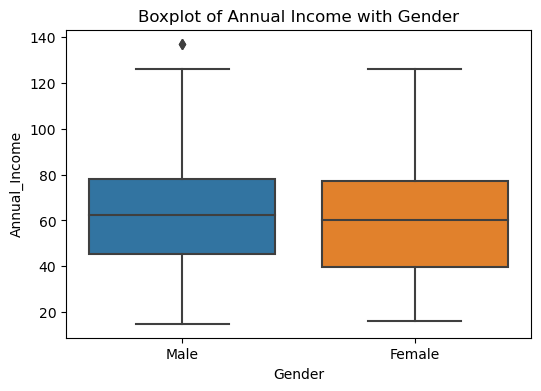

In [37]:
plt.figure(figsize = (6,4))
sns.boxplot(x = 'Gender', y = "Annual_Income", data = df)
plt.title("Boxplot of Annual Income with Gender")
plt.show()

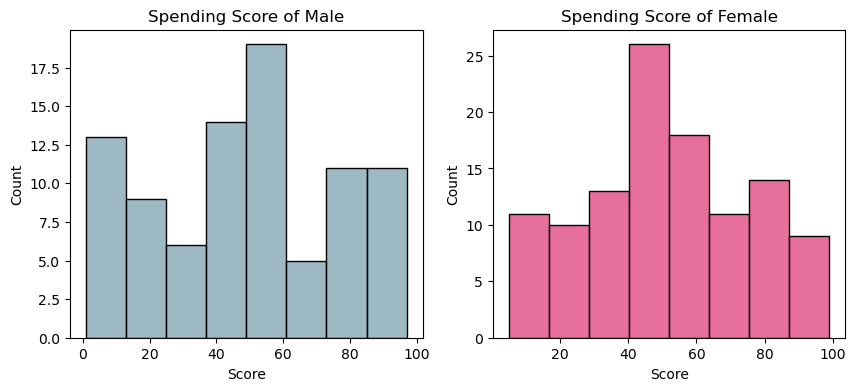

In [38]:
score_male = df[df.Gender == "Male"]["Score"]
score_female = df[df.Gender != "Male"]["Score"]

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(score_male, color = "#7CA3B1")
plt.title("Spending Score of Male")

plt.subplot(1,2,2)
sns.histplot(score_female, color = '#DF3F7B')
plt.title("Spending Score of Female")
plt.show()

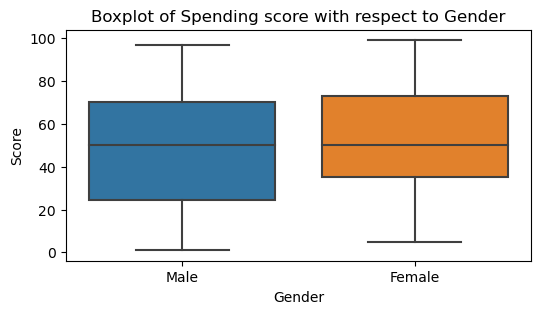

In [39]:
plt.figure(figsize = (6,3))

sns.boxplot(x = df.Gender, y = df.Score)
plt.title('Boxplot of Spending score with respect to Gender')
plt.show()

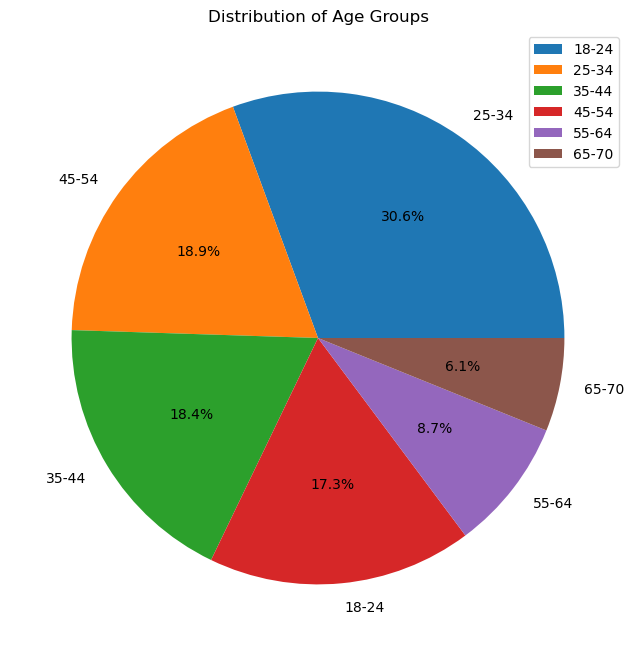

In [40]:
df['Age_Group'] = pd.cut(df.Age, bins = [18, 25, 35, 45, 55, 65, 70], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])

plt.figure(figsize = (8,8))
plt.pie(df.Age_Group.value_counts(), labels = df.Age_Group.value_counts().index, autopct = '%1.1f%%')
plt.title('Distribution of Age Groups')
plt.legend(['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])
plt.show()

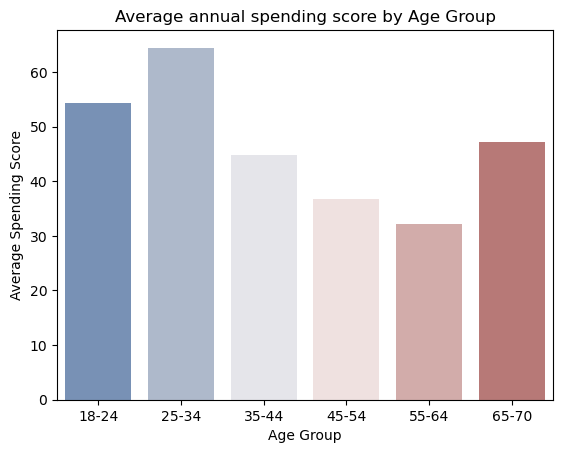

In [42]:
mean_score = df.groupby('Age_Group')['Score'].mean()

sns.barplot(x = mean_score.index , y = mean_score.values, palette = 'vlag')

plt.title("Average annual spending score by Age Group")
plt.ylabel("Average Spending Score")
plt.xlabel("Age Group")
plt.show()

In [43]:
df.drop("Age_Group", axis =1, inplace = True)

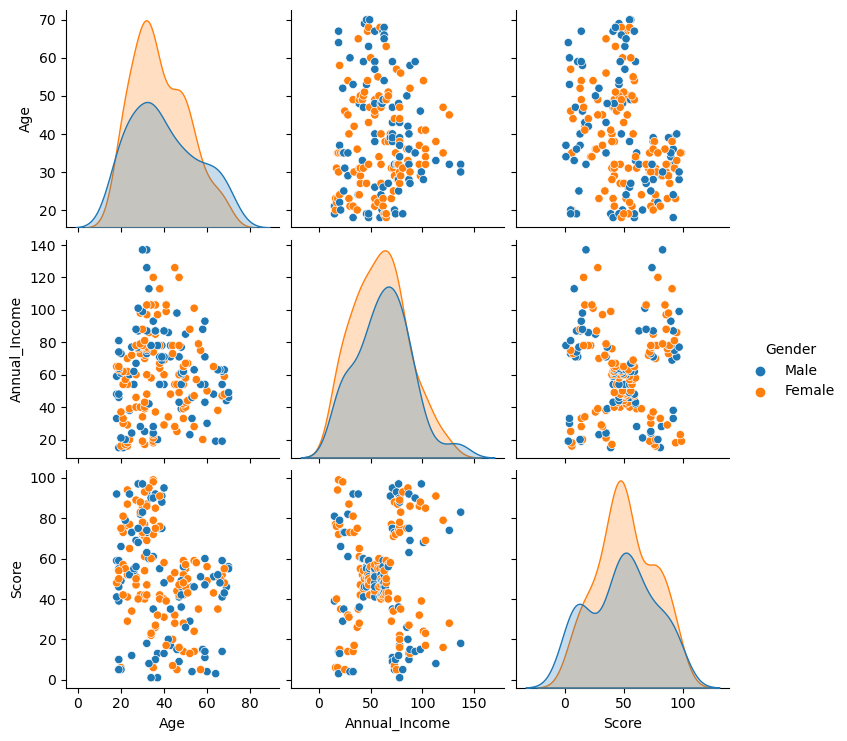

In [44]:
sns.pairplot(df.drop("CustomerID", axis =1), hue="Gender")

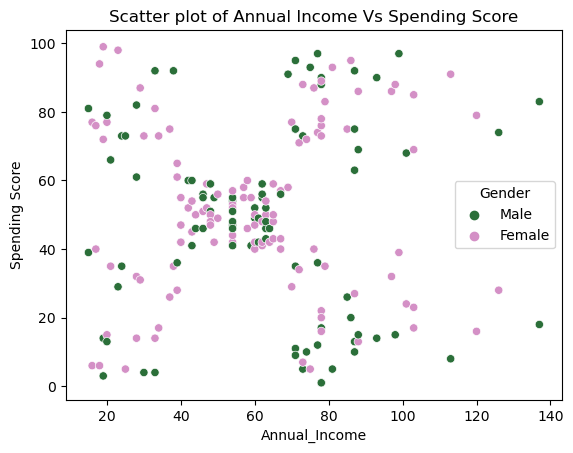

In [45]:
sns.scatterplot(x = df.Annual_Income, y = df.Score, hue=df.Gender, palette='cubehelix')
plt.title("Scatter plot of Annual Income Vs Spending Score")
plt.ylabel("Spending Score")
plt.show()

In [46]:
X = df.copy()

enc = LabelEncoder()
X['Gender'] = enc.fit_transform(X['Gender'])
X.drop("CustomerID", axis=1, inplace = True)
X.head()

Gender  Age  Annual_Income  Score
0       1   19             15     39
1       1   21             15     81
2       0   20             16      6
3       0   23             16     77
4       0   31             17     40

In [47]:
KM_model = KMeans(random_state = 0)
visualise = KElbowVisualizer(KM_model, k=(2,10))

visualise.fit(X)
visualise.show()
plt.show()

NameError: name 'KElbowVisualizer' is not defined

In [48]:

visualise = KElbowVisualizer(KM_model, k=(2,10), metric = 'silhouette')

visualise.fit(X)
visualise.show()
plt.show()

NameError: name 'KElbowVisualizer' is not defined

In [49]:
# K-Mean

#Choosing n_cluster = 5

In [50]:
cluster_5 = KMeans(n_clusters = 5, init = 'k-means++')
cluster_5.fit(X)

cluster_label_5 = cluster_5.predict(X)

silh_5 = silhouette_score(X, cluster_label_5)

print("Silhouette Score of 5 Clusters: ", silh_5)

KM_5 = df.copy()
KM_5.loc[:, 'Cluster']= cluster_5.labels_

Silhouette Score of 5 Clusters:  0.4440669204743008


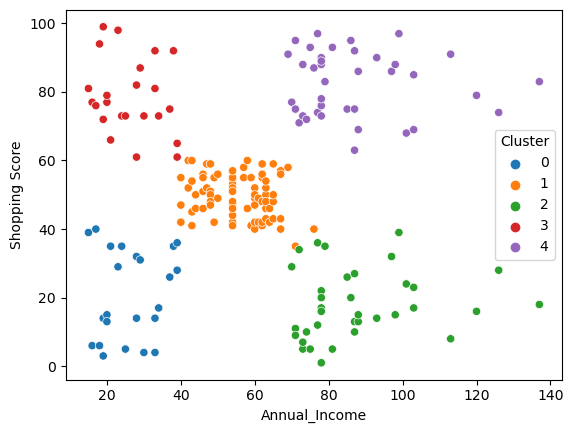

In [51]:
sns.scatterplot(x = "Annual_Income", y = 'Score', data=KM_5, hue = 'Cluster', legend= 'full', palette = 'tab10')
plt.ylabel("Shopping Score")
plt.show()

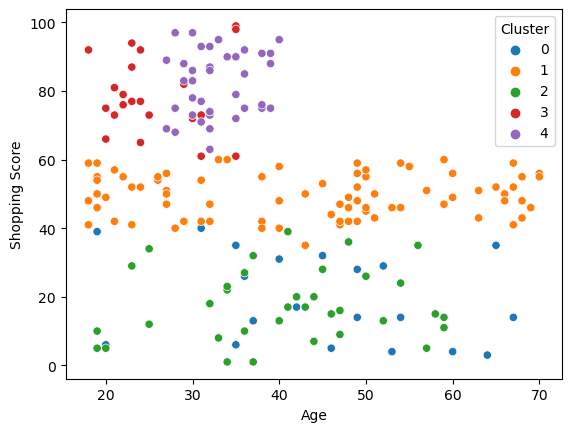

In [52]:
sns.scatterplot(x = "Age", y = 'Score', data=KM_5, hue = 'Cluster', legend= 'full', palette = 'tab10')
plt.ylabel("Shopping Score")
plt.show()

In [53]:
model = KMeans(n_clusters = 5, random_state = 0)
visualizer = SilhouetteVisualizer(model, colors = 'yellowbrick')
visualizer.fit(X)
visualizer.show()
plt.show()

NameError: name 'SilhouetteVisualizer' is not defined

In [54]:
KM_clust_sizes = KM_5.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

KM_size
Cluster         
0             23
1             79
2             36
3             23
4             39

In [55]:
fig = px.scatter_3d(KM_5, x = "Age", y = "Annual_Income", z = "Score", color = 'Cluster', opacity=0.7)
fig.show()

In [56]:
#choosing n_cluster = 6